In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks
from scipy.stats import skew
import seaborn as sns
import os
#from fpdf import FPDF


In [2]:
#file_path1={'file_name': '/Users/psehgal/Data.csv'}
#file_location = file_path1['file_name'] 
file_name = '/Users/psehgal/atp_test/Data_hard.csv'
tophard1png = '/Users/psehgal/dev/airflow_home/Tennis_Data_Pipeline_airflow_Project/images_for_reports/tophard1png.png'
tophard2png = '/Users/psehgal/dev/airflow_home/Tennis_Data_Pipeline_airflow_Project/images_for_reports/tophard2png.png'
tophardcsv = '/Users/psehgal/dev/airflow_home/Tennis_Data_Pipeline_airflow_Project/images_for_reports/tophardcsv.csv'

In [3]:
# Parameters
file_name = "/Users/psehgal/atp_test/Data_hard.csv"
tophard1png = "/Users/psehgal/dev/airflow_home/Tennis_Data_Pipeline_airflow_Project/images_for_reports/tophard1png.png"
tophard2png = "/Users/psehgal/dev/airflow_home/Tennis_Data_Pipeline_airflow_Project/images_for_reports/tophard2png.png"
tophard3csv = "/Users/psehgal/dev/airflow_home/Tennis_Data_Pipeline_Airflow_Project/images_for_reports/tophardcsv.csv"


In [4]:
#data = pd.read_csv('/Users/psehgal/dev/airflow_home/kaggleatpdata.csv', dtype='unicode')
data = pd.read_csv(file_name, encoding = 'ISO-8859-1')

In [5]:
data

,Unnamed: 0,Unnamed: 0.1,ATP,Location,Tournament,Date,Series,Court,Surface,Round,...,L2,W3,L3,W4,L4,W5,L5,Wsets,Lsets,Comment
0,0,0,1,Adelaide,Australian Hardcourt Championships,3/01/2000,International,Outdoor,Hard,1st Round,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,Completed
1,1,1,1,Adelaide,Australian Hardcourt Championships,3/01/2000,International,Outdoor,Hard,1st Round,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,Completed
2,2,2,1,Adelaide,Australian Hardcourt Championships,3/01/2000,International,Outdoor,Hard,1st Round,...,5.0,6.0,3.0,NaN,NaN,NaN,NaN,2.0,1.0,Completed
3,3,3,1,Adelaide,Australian Hardcourt Championships,3/01/2000,International,Outdoor,Hard,1st Round,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,Completed
4,4,4,1,Adelaide,Australian Hardcourt Championships,3/01/2000,International,Outdoor,Hard,1st Round,...,7.0,6.0,4.0,NaN,NaN,NaN,NaN,2.0,1.0,Completed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24329,46647,46647,54,St. Petersburg,St. Petersburg Open,23/09/2016,ATP250,Indoor,Hard,Quarterfinals,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,Completed
24330,46648,46648,54,St. Petersburg,St. Petersburg Open,23/09/2016,ATP250,Indoor,Hard,Quarterfinals,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,Completed
24331,46649,46649,54,St. Petersburg,St. Petersburg Open,24/09/2016,ATP250,Indoor,Hard,Semifinals,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,Completed
24332,46650,46650,54,St. Petersburg,St. Petersburg Open,24/09/2016,ATP250,Indoor,Hard,Semifinals,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,Completed


In [6]:
data.Series.unique()

array(['International', 'Grand Slam', 'International Gold', 'Masters',
       'Masters Cup', 'ATP250', 'ATP500', 'Masters 1000'], dtype=object)

In [7]:
# Best 10 players on clay, grass, and hard surfaces

In [8]:
# df with column names
surface = data[['Surface', 'Winner', 'Loser']]

In [9]:
surface.shape

(24334, 3)

In [10]:
# create 2 df for winner and looser and change the column names to player
surface_w = surface[['Surface', 'Winner']]
surface_l = surface[['Surface', 'Loser']]
surface_w.columns = ['Surface', 'Player']
surface_l.columns = ['Surface', 'Player']

In [11]:
# add 1 more column to the df and fill with sequential nums from 1 to length of df
surface_w['idx'] = range(1, len(surface_w) + 1)
surface_l['idx'] = range(1, len(surface_l) + 1)

In [12]:
# count the num of winning matches for every surface and player combination 
surface_w = surface_w.groupby(['Surface', 'Player']).count()
surface_w = surface_w.reset_index()
surface_w.columns = ['Surface', 'Player', 'Count_Win']


In [13]:
# count the num of lost matches for every surface and player combination
surface_l = surface_l.groupby(['Surface', 'Player']).count()
surface_l = surface_l.reset_index()
surface_l.columns = ['Surface', 'Player', 'Count_Lose']

In [14]:
surface = pd.merge(surface_w, surface_l, on=['Surface', 'Player'])

In [15]:
surface['total_play'] = surface['Count_Win'] + surface['Count_Lose']

In [16]:
surface['perc_win'] = round(surface['Count_Win'] / surface['total_play'],4)*100

In [17]:
surface = surface[surface.total_play > 50]

In [18]:
surface.sort_values(by='perc_win', ascending=False).head(30)

,Surface,Player,Count_Win,Count_Lose,total_play,perc_win
142,Hard,Djokovic N.,469,82,551,85.12
175,Hard,Federer R.,622,124,746,83.38
2,Hard,Agassi A.,203,56,259,78.38
424,Hard,Murray A.,369,110,479,77.04
426,Hard,Nadal R.,363,112,475,76.42
509,Hard,Roddick A.,402,136,538,74.72
531,Hard,Sampras P.,73,26,99,73.74
129,Hard,Del Potro J.M.,220,90,310,70.97
257,Hard,Hewitt L.,324,138,462,70.13
491,Hard,Raonic M.,165,71,236,69.92


In [19]:
# Best players on Hard

top_Hard = surface[surface.Surface == 'Hard'].sort_values(by='perc_win', ascending = False).head(10)
#top_Hard.to_csv('top_hard.csv')

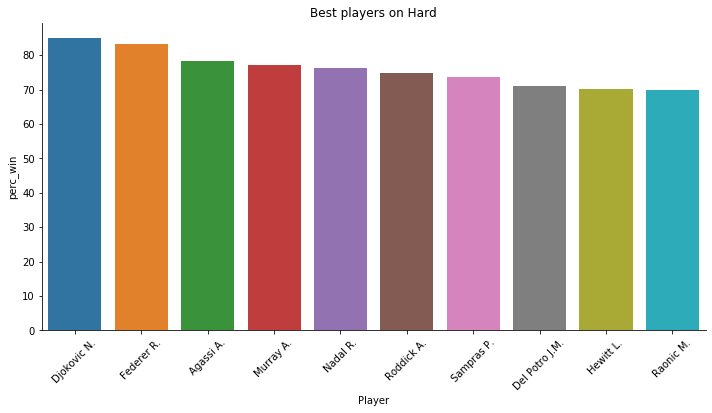

In [20]:
# plot the graph
g=sns.catplot(x='Player', y='perc_win', data=top_Hard, kind='bar', height=5, aspect=2)
g.set_xticklabels(labels = top_Hard.Player,  rotation=45)
plt.title('Best players on Hard')
plt.savefig(tophard1png, bbox_inches='tight')

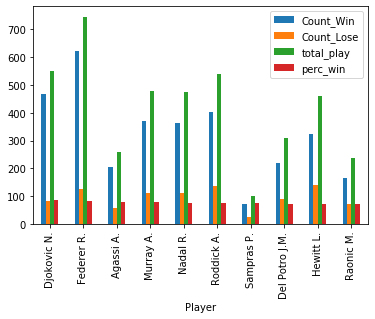

In [21]:
top_Hard.plot(x='Player', kind='bar')
plt.savefig(tophard2png, bbox_inches='tight')


In [22]:
#from pandas.plotting import table
#ax = plt.subplot(111, frame_on=True) # no visible frame
#ax.xaxis.set_visible(False)  # hide the x axis
#ax.yaxis.set_visible(False)  # hide the y axis
#
#table(ax, top_Clay)  # where df is your data frame
#
#plt.savefig('claytable.png', bbox_inches='tight')

In [23]:
top_Hard.to_csv(tophardcsv)